# Lab 7 - Linear Models, Cost Functions, and Regularization
- **Author:** Suraj R. Nair([suraj.nair@berkeley.edu](mailto:suraj.nair@berkeley.edu))
- **Date:** February 28, 2024
- **Course:** INFO 251: Applied machine learning

## Learning objectives:
At the end of this lab, you will be able to...
- Train a linear model end-to-end by defining the model, the cost function, and the regularization, taking partial derivatives, and running gradient descent
- Understand the differences between common loss functions
- Compare Ridge and LASSO regularization, and optimize both with gradient descent
- Use cross validation to find the optimal regularization parameter for Ridge and LASSO

## Topics:
1. Cross validation to find the optimal regularization parameter

**NOTE:** The other topics in this lab are covered in the lecture and participatory activities.

## Resources:
1. [Loss functions cheat sheet](https://ml-cheatsheet.readthedocs.io/en/latest/loss_functions.html)
2. [Gradient descent for linear regression lecture notes](https://www.cs.toronto.edu/~rgrosse/courses/csc321_2017/readings/L02%20Linear%20Regression.pdf)


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, LassoCV
from sklearn.metrics import r2_score

## 1. Cross validation to find the optimal regularization parameter

In [5]:
# Load data, drop columns with nulls
df = pd.read_csv('auto.csv')
outcome = 'acceleration'
features = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'year']

for feature in features:
    df[feature] = df[feature].apply(lambda x: np.nan if x == '?' else float(x))
df = df.dropna(subset = [outcome] + features)

#### Divide into random train set (75%) and test set (25%)

In [6]:

train, test = train_test_split(df, test_size=.25, shuffle=True, random_state=1)
print('Number of training observations: %i' % len(train))
print('Number of testing observations: %i' % len(test))

# Separate output from inputs
x_train, y_train = train[features], train[outcome]
x_test, y_test = test[features], test[outcome]

Number of training observations: 294
Number of testing observations: 98


#### COMPLETE:  Train a linear regression on the training set, produce predictions on the train + test set

In [7]:
## COMPLETE: Initialize the model
model = LinearRegression()

## COMPLETE: Fit the model on the training data
model.fit(x_train, y_train)

# COMPLETE: Generate predictions on training + test set
yhat_train = model.predict(x_train)
yhat_test = model.predict(x_test)

# Print Results
print('Linear regression r2 on training set: %.2f' % r2_score(y_train, yhat_train))
print('Linear regression r2 on test set: %.2f' % r2_score(y_test, yhat_test))

Linear regression r2 on training set: 0.62
Linear regression r2 on test set: 0.56


#### COMPLETE:  Train a linear regression with LASSO on the training set, produce predictions on the train + test set

In [8]:
# Train a LASSO regression on the training set, produce predictions on the train + test set

## COMPLETE: Initialize the model (set alpha = 1)
model = Lasso(alpha = 1)

## COMPLETE: Fit the model on training data
model.fit(x_train, y_train)

## COMPLETE: Generate predictions on the training + test data
yhat_train = model.predict(x_train)
yhat_test = model.predict(x_test)


## Print Results
print('Linear regression r2 on training set: %.2f' % r2_score(y_train, yhat_train))
print('Linear regression r2 on test set: %.2f' % r2_score(y_test, yhat_test))

Linear regression r2 on training set: 0.62
Linear regression r2 on test set: 0.58


#### COMPLETE: Use 5 fold cross validation to determine the optimal LASSO on the training set

In [22]:
kf = KFold(n_splits=5, shuffle=True, random_state = 12)

lmbdas = np.logspace(-3, 1, 20)
scores = []
for lmbda in lmbdas:
    ## COMPLETE: Initialize the model with lmbda
    model = Lasso(alpha=lmbda, random_state=1)
    ## COMPLETE: Get the main CV score (use cross_val_score)
    cv_score = cross_val_score(model, x_train, y_train, scoring='r2', cv=kf)  ## fill in the arguments here
    scores.append(np.mean(cv_score))
    
print(np.round(scores, 3))

[0.58  0.58  0.58  0.58  0.58  0.58  0.58  0.58  0.58  0.579 0.579 0.578
 0.579 0.582 0.583 0.583 0.582 0.58  0.572 0.547]


#### Plot cross-validated r2 as a function of regularization strength

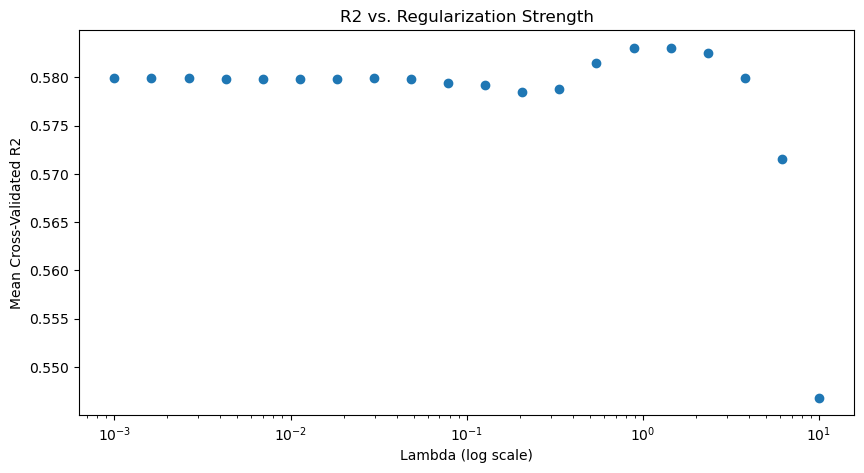

In [15]:
fig, ax = plt.subplots(1, figsize=(10, 5))
ax.scatter(lmbdas, scores)
ax.set_xscale('log')
ax.set_xlabel('Lambda (log scale)')
ax.set_ylabel('Mean Cross-Validated R2')
ax.set_title('R2 vs. Regularization Strength')
plt.show()

#### Get best lambda value

In [11]:
print('Maximum cross-validated r2: %.2f' % np.max(scores))
best_lmbda = lmbdas[np.argmax(scores)]
print('Lambda associated with best maximum cross-validated r2: %.2f' % best_lmbda)

Maximum cross-validated r2: 0.58
Lambda associated with best maximum cross-validated r2: 1.44


#### Fit LASSO with optimal lambda on train set, predict on training and test set

In [17]:
#Initialize the model
model = Lasso(alpha = best_lmbda)

# Fit the model on training data
model.fit(x_train, y_train)

#Predict on training + test data
yhat_train = model.predict(x_train)
yhat_test = model.predict(x_test)

print('Linear regression r2 on training set: %.2f' % r2_score(y_train, yhat_train))
print('Linear regression r2 on test set: %.2f' % r2_score(y_test, yhat_test))

Linear regression r2 on training set: 0.62
Linear regression r2 on test set: 0.58


#### Alternative: Use sklearn's built-in LassoCV functionality

In [14]:
model = LassoCV(alphas = lmbdas, cv = kf, random_state = 12) ## Note: no option to shuffle, so use the cv object from above. 
model.fit(x_train, y_train)
yhat_train = model.predict(x_train)
yhat_test = model.predict(x_test)

print('Linear regression r2 on training set: %.2f' % r2_score(y_train, yhat_train))
print('Linear regression r2 on test set: %.2f' % r2_score(y_test, yhat_test))
print('Chosen lambda value: %.2f' % model.alpha_)

Linear regression r2 on training set: 0.62
Linear regression r2 on test set: 0.58
Chosen lambda value: 0.89
